## Set Up

In [1]:
# Set Up
import pandas as pd
from matplotlib import pyplot as plt
import sqlalchemy as db
import numpy as np
from decouple import config

# Get your database server details from your .env file
passw = config('Database_Password') 
server = config('Server')    # "@localhost:{portnumber}"
url = config('Database_URL') # "postgresql://"
user = config('Owner')
datab = config('Database') # "/Employees"

# Connect to the database
engine = db.create_engine(url + user + passw + server + datab)
connection = engine.connect()
metadata = db.MetaData()

In [2]:
# Create DataFrames for all the tables
for table in ['departments','dept_emp','dept_manager','employees','salaries','titles']:
    df_table = db.Table(table, metadata, autoload=True, autoload_with=engine)
    query = db.select([df_table])
    ResultProxy = connection.execute(query)
    ResultSet = ResultProxy.fetchall()
    
    # Assign tables to DataFrames
    if(table == 'departments'):
        departments = pd.DataFrame(ResultSet)
        departments.columns = ResultSet[0].keys()
    elif(table == 'dept_emp'):
        dept_emp = pd.DataFrame(ResultSet)
        dept_emp.columns = ResultSet[0].keys()
    elif(table == 'dept_manager'):
        dept_manager = pd.DataFrame(ResultSet)
        dept_manager.columns = ResultSet[0].keys()
    elif(table == 'employees'):
        employees = pd.DataFrame(ResultSet)
        employees.columns = ResultSet[0].keys()
    elif(table == 'salaries'):
        salaries = pd.DataFrame(ResultSet)
        salaries.columns = ResultSet[0].keys()
    else:
        titles = pd.DataFrame(ResultSet)
        titles.columns = ResultSet[0].keys()

## Perliminary Analysis and Cleaning

In [3]:
# Look for Null Values
print("Number of Null Values in Salaries")
print(salaries.isna().sum())
print()

# Replace Null Values
salaries["salary"] = salaries["salary"].fillna(0)

## Salary Analysis
print(f'Salary Min is {salaries["salary"].min()}')
print(f'Salary Max is {salaries["salary"].max()}')
print("Range is: " + str(salaries["salary"].max() - salaries["salary"].min()))
print(f'Row count is {salaries["salary"].count()}')

print()
print("Salaries Description")
print(salaries.describe())

Number of Null Values in Salaries
emp_no    0
salary    0
dtype: int64

Salary Min is 40000
Salary Max is 129492
Range is: 89492
Row count is 300024

Salaries Description
              emp_no         salary
count  300024.000000  300024.000000
mean   253321.763392   52970.732451
std    161828.235540   14301.478491
min     10001.000000   40000.000000
25%     85006.750000   40000.000000
50%    249987.500000   48681.000000
75%    424993.250000   61758.000000
max    499999.000000  129492.000000


## Create a histogram to visualise the most common salary ranges for employees.

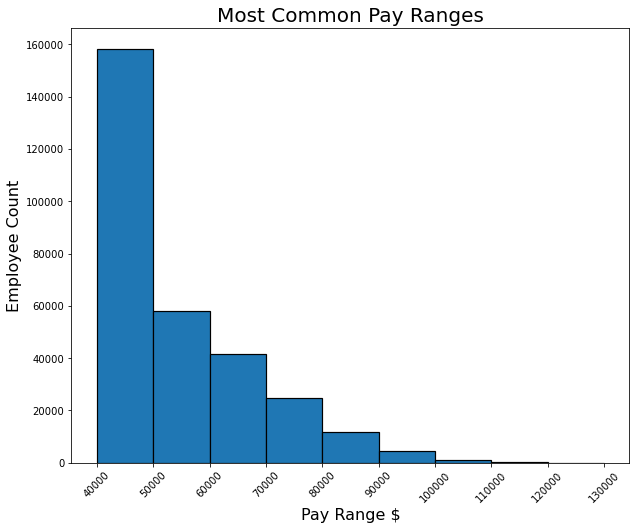

In [4]:
income_ranges = np.arange(40000,140000,10000)

plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(salaries.salary,bins=income_ranges, edgecolor='black', linewidth=1.2)

plt.xticks(bins, rotation = '45')
plt.xlabel("Pay Range $", size=16)
plt.ylabel("Employee Count", size=16)
plt.title("Most Common Pay Ranges", size=20)

# Show the chart
plt.show()

## Create a bar chart of average salary by title.

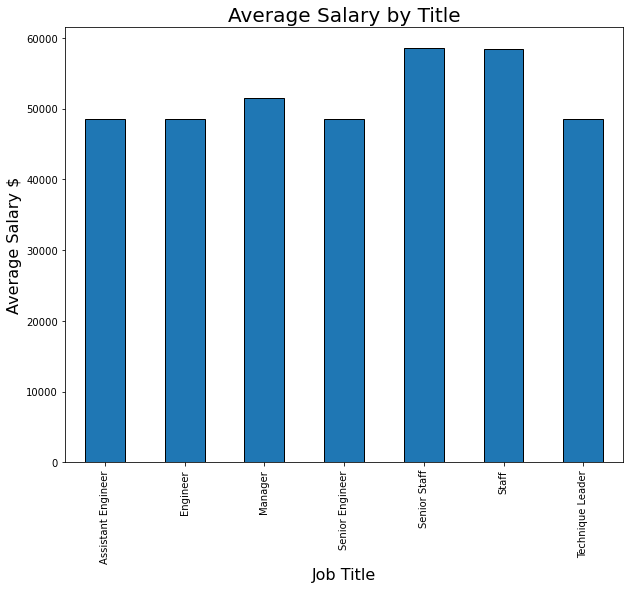

In [5]:
# Merge the tables "salaries", "employees", and "titles"
employees = employees.rename(columns={"emp_title_id": "title_id"})
df = employees.merge(titles, on="title_id", how="outer").merge(salaries, on="emp_no")

# Find the average salary by title
df_avg = df[["title","salary"]].groupby("title").mean("salary").round(2).reset_index()

# Create the chart
avg_sal_plot = df_avg.plot(kind="bar", x="title",y="salary", edgecolor='black', legend=False, figsize=(10,8))

avg_sal_plot.set_xlabel("Job Title", size=16)
avg_sal_plot.set_ylabel("Average Salary $", size=16)
avg_sal_plot.set_title("Average Salary by Title", size=20)

# Show the chart
plt.show()